# Gradient Descent Implementation
The optimization algorithm **gradient descent** will be implemented to calculate regression parameters on a small dataset, with one independent variable, for optimal visualization and understanding.

## Basic Libraries

In [1]:
# Basic libraries
import numpy as np
import matplotlib.pyplot as plt

## Data Collection
The data has been generated so that there is a linear relationship between $x$ and the dependent variable $y$, which will facilitate the construction of a linear model between the two.

In [2]:
# Generate 100 values of x between 0 and 10
np.random.seed(42)
x = np.linspace(0, 10, 100)

# y = 3*x + 7 + some noise so it's not perfect
y = 3 * x + 7 + np.random.normal(0, 1, 100)

x, y

(array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
         0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
         1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
         1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
         2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
         2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
         3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
         3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
         4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
         4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
         5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
         5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
         6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
         6.56565657,  6.66666667,  6.76767677,  6.8

## Data Visualization
Using Matplotlib, we visualize the data in the plane.

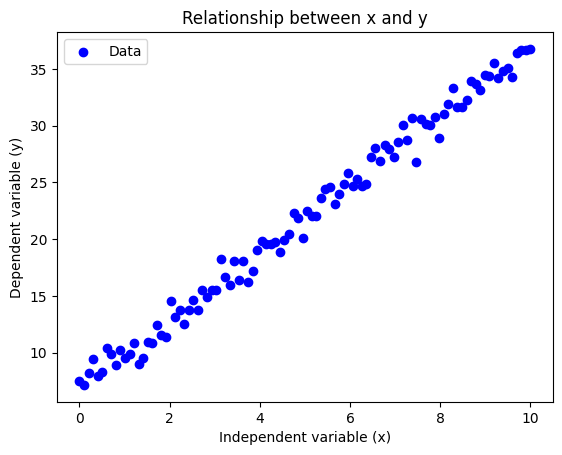

In [3]:
plt.scatter(x, y, color='blue', label='Data')
plt.xlabel('Independent variable (x)')
plt.ylabel('Dependent variable (y)')
plt.title('Relationship between x and y')
plt.legend()
plt.show()

## Initial Required Data

We have the matrix $X$ with the bias added:
$$
X=\begin{pmatrix}
    1 & x^{(1)}\\
    1 & x^{(2)}\\
    \vdots & \vdots\\
    1 & x^{(n)}
    \end{pmatrix}
$$
Where $n$ is the number of data points and $d=1$ is the number of independent variables.

In [4]:
X = np.column_stack((np.ones_like(x), x))  # X matrix with column of ones
n, d = X.shape  # n = number of data points, d = number of features (2 in this case)

## Cost Function
Function that calculates the cost between predictions and actual values
$$
J(\theta) = \frac{1}{2n} \sum_{i=1}^n (\hat{y}^{(i)}-y^{(i)})^2
$$

In [5]:
def compute_cost(X, y, theta):
    y_pred = X @ theta
    return ((y_pred - y) ** 2).mean() / 2

## Gradient Descent
Implementation of the gradient descent algorithm using the formula
$$
\theta =\theta - \alpha \nabla_\theta J(\theta)
$$
With
$$
\nabla_\theta J(\theta) = \frac{1}{n}X^T(\hat{y}-y)
$$
We will stop the execution of the loop when:
$$
\| \theta^{(t)}-\theta^{(t+1)} \| < \epsilon
$$

In [6]:
def gradient_descent(X, y, alpha=0.01, max_iter=1000, tol=1e-6):
    theta = np.random.rand(X.shape[1])
    cost_history = []

    for i in range(max_iter):
        y_pred = X @ theta
        error = y_pred - y
        grad = X.T @ error / n
        theta_prev = theta.copy()
        theta = theta - alpha * grad

        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        # stopping criterion
        if np.linalg.norm(theta - theta_prev) < tol:
            print(f'Convergence at iteration {i+1}')
            break
    return theta, cost_history

## Gradient Descent Execution

In [7]:
alpha = 0.01
max_iter = 1000
tol = 1e-6

theta_opt, cost_hist = gradient_descent(X, y, alpha, max_iter, tol)
print(f'Optimized parameters: {theta_opt}')

Optimized parameters: [6.33913749 3.0871765 ]


## Cost Convergence Visualization

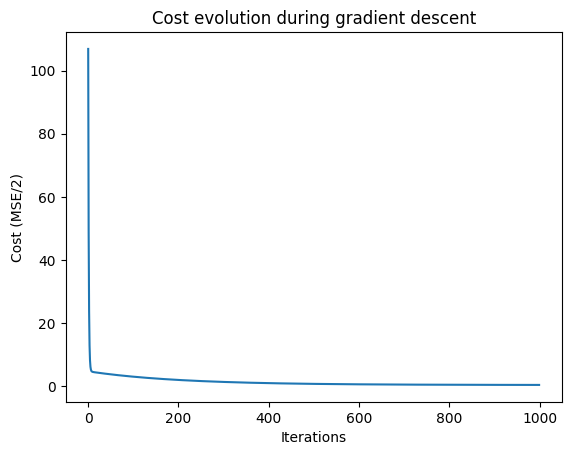

In [8]:
plt.plot(cost_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE/2)')
plt.title('Cost evolution during gradient descent')
plt.show()

## Final Visualization with Prediction

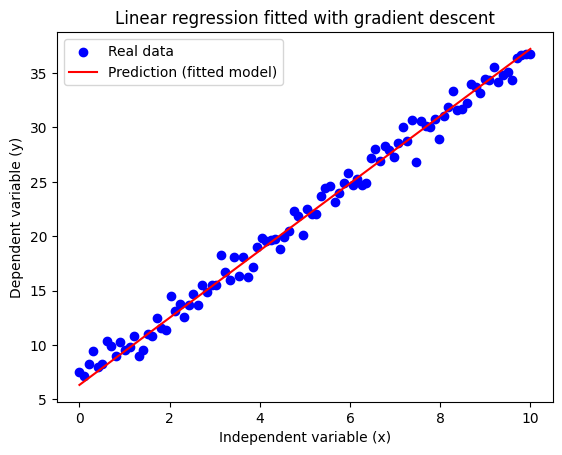

In [9]:
# Final prediction
y_pred_final = X @ theta_opt

# Plot
plt.scatter(x, y, color='blue', label='Real data')
plt.plot(x, y_pred_final, color='red', label='Prediction (fitted model)')
plt.xlabel('Independent variable (x)')
plt.ylabel('Dependent variable (y)')
plt.title('Linear regression fitted with gradient descent')
plt.legend()
plt.show()

## Coefficient of Determination $R^2$
A measure to evaluate how effective the algorithm was in its predictions is the **Coefficient of Determination** or $R^2$, given by:
$$
R^2= 1-\frac{\sum_{i=1}^n(y^{(i)}-\hat{y}^{(i)})^2}{\sum_{i=1}^n(y^{(i)}-\bar{y}^{(i)})^2}  
$$

In [10]:
R2 = 1 - np.sum((y - y_pred_final)**2) / np.sum((y - np.mean(y))**2)
print("R² (manual) =", R2)

R² (manual) = 0.988782502493475


While with sklearn's $R^2$ we get:

In [11]:
from sklearn.metrics import r2_score

r2 = r2_score(y, y_pred_final)
print("R² (sklearn) =", r2)


R² (sklearn) = 0.988782502493475
